### Machine Learning to predict water potability

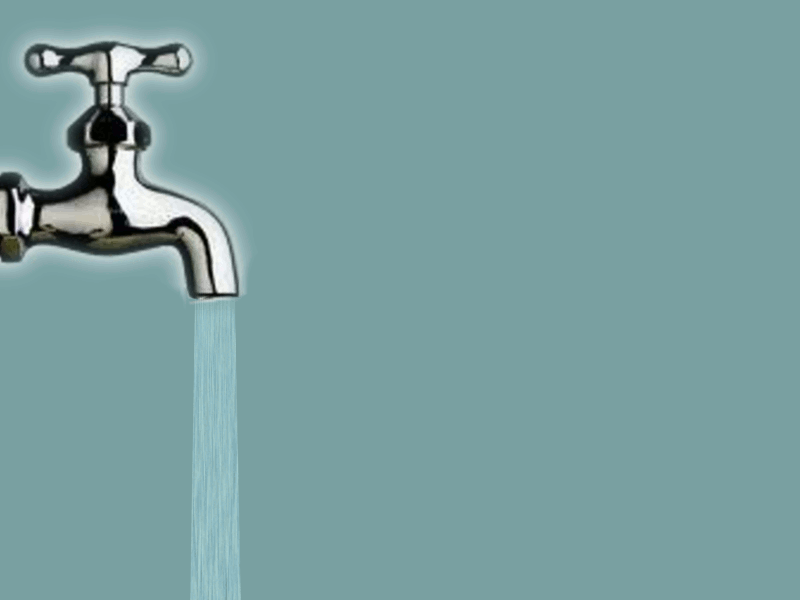

The modern world has increasingly advanced in the process of water treatment and sanitation... However, some countries still suffer from problems regarding sanitation and water potability... With that in mind, I have developed a predictive model  to be able to discover the potability of the water + a streamlit deployment for anyone to use in a simple and easy way.

## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import pickle

warnings.filterwarnings('ignore')

### DF

In [2]:
df  = pd.read_csv('water_potability.csv') ; df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Exploratory Analysis

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
for column in df.columns:
    print("{} has {} unique values".format(column,len(df[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


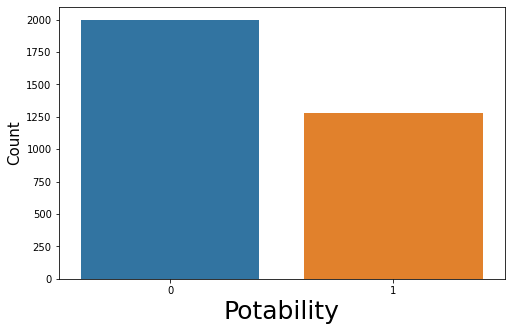

In [10]:
pot_lbl = df.Potability.value_counts()
## Making a class balancing graph

plt.figure(figsize=(8,5))
sns.barplot(pot_lbl.index,pot_lbl);
plt.xlabel('Potability',fontsize=25)
plt.ylabel('Count',fontsize=15);

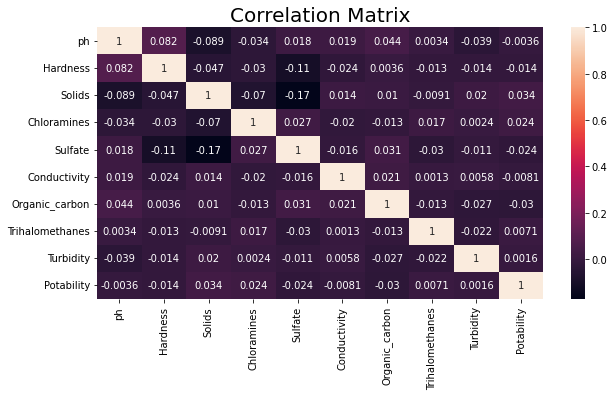

In [11]:
#Correlation

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20);


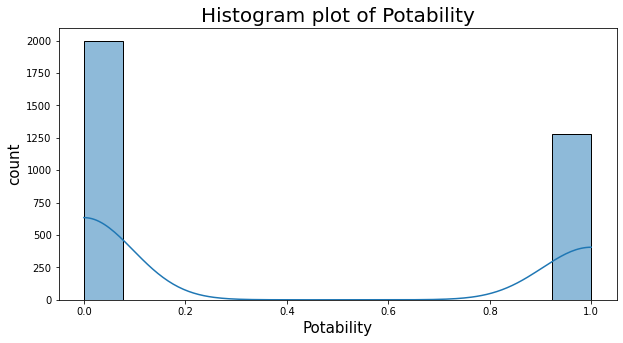

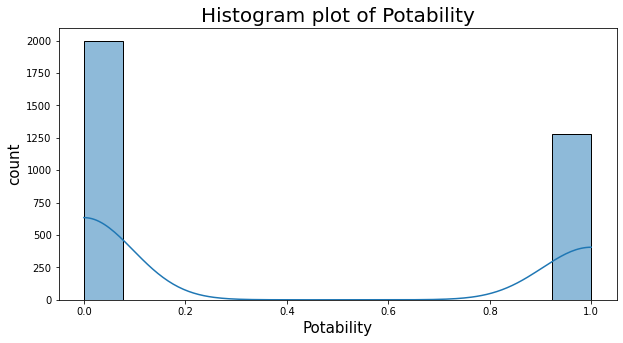

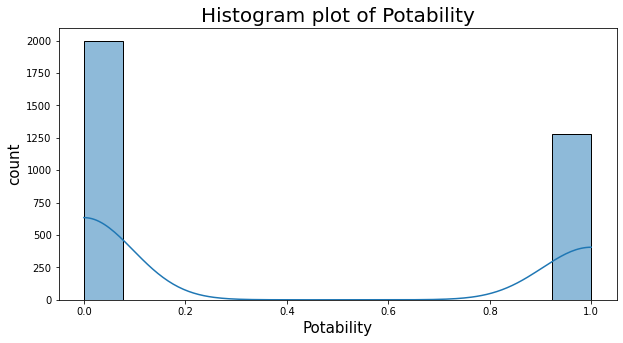

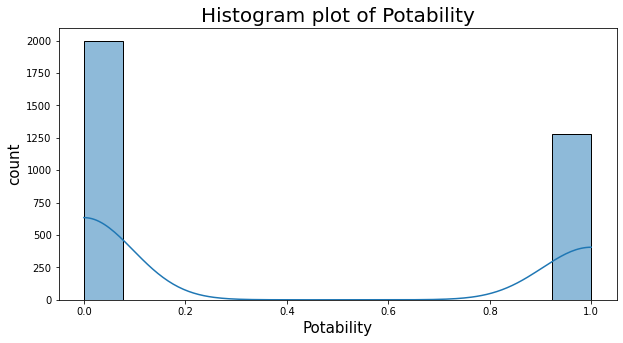

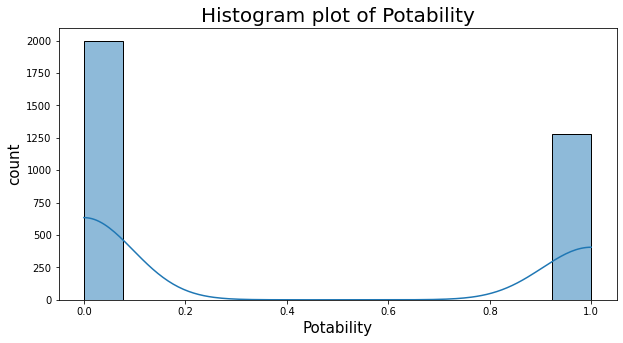

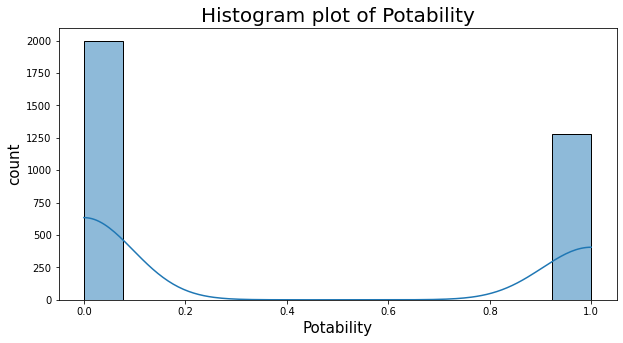

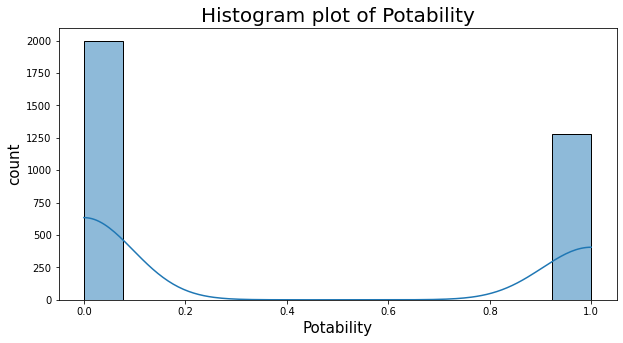

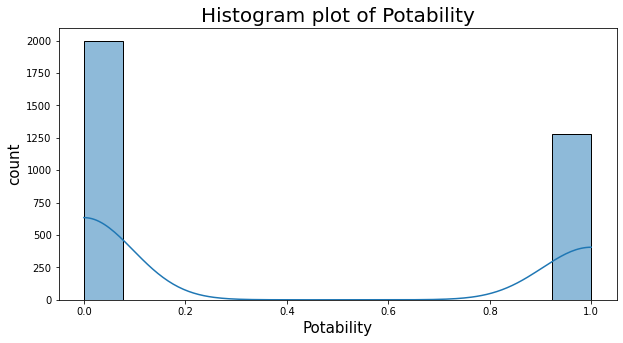

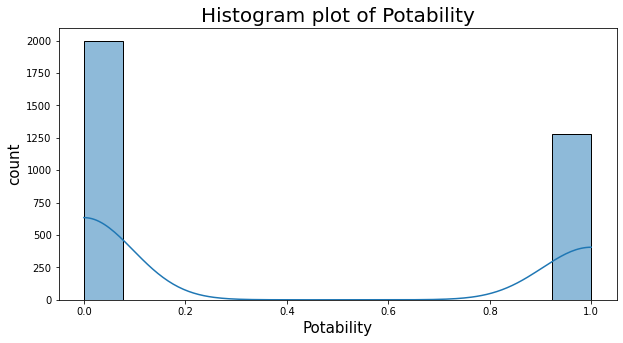

In [12]:
for feature in df.columns[:-1]:
    plt.figure(figsize=(10,5))
    sns.histplot(df[column],kde=True)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('count',fontsize=15)
    plt.title('Histogram plot of {}'.format(column),fontsize=20);

## Data Pre-Processing



In [13]:
for feature in df.columns:
     print('{}  \t \t \t {:.1f}% null values'.format(feature, (df[feature].isnull().sum()/len(df)) *100 ))

ph  	 	 	 15.0% null values
Hardness  	 	 	 0.0% null values
Solids  	 	 	 0.0% null values
Chloramines  	 	 	 0.0% null values
Sulfate  	 	 	 23.8% null values
Conductivity  	 	 	 0.0% null values
Organic_carbon  	 	 	 0.0% null values
Trihalomethanes  	 	 	 4.9% null values
Turbidity  	 	 	 0.0% null values
Potability  	 	 	 0.0% null values


## Imputation by the average

In [14]:
ph_mean = df[df['Potability']==0]['ph'].mean(skipna=True)
df.loc[(df['Potability']==0) & (df['ph'].isna()),'ph'] = ph_mean

ph_mean_1 = df[df['Potability']==1]['ph'].mean(skipna=True)
df.loc[(df['Potability']==1) & (df['ph'].isna()),'ph'] = ph_mean_1


sulf_mean = df[df['Potability']==0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability']==0) & (df['Sulfate'].isna()),'Sulfate'] = sulf_mean


sulf_mean_1 = df[df['Potability']==1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability']==1) & (df['Sulfate'].isna()),'Sulfate'] = sulf_mean_1

Tri_mean = df[df['Potability']==0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability']==0) & (df['Trihalomethanes'].isna()),'Trihalomethanes'] = Tri_mean

Tri_mean_1 = df[df['Potability']== 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability']== 1) & (df['Trihalomethanes'].isna()),'Trihalomethanes'] = Tri_mean_1 





In [15]:
df.loc[(df['Potability']==0)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3112,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,0
3113,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0




## Separation of Explanatory and Target variables

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

## Data Sampling



In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

In [19]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)

X_train Shape: (2620, 9)
X_test Shape: (656, 9)


In [20]:
print('Y_train Shape:', y_train.shape)
print('Y_test Shape:',y_test.shape)

Y_train Shape: (2620,)
Y_test Shape: (656,)




## Data standardization

In [21]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_test[0]

array([ 0.70517827,  0.62140614,  1.86090959,  0.08639686, -0.59502071,
       -1.77878841, -0.38380948,  0.76490871,  0.58902953])

## Building and Evaluating Predictive Models with Machine Learning

In [23]:
models_acc = []
models = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB(),SVC()]

for model in models:
    ''' fit on data '''
    model.fit(X_train, y_train)
        
    pred = model.predict(X_test)
    
    '''Appending result to model_acc'''
    models_acc.append(accuracy_score(y_test,pred))
    

In [24]:
res = pd.DataFrame(
{'Model Accuracy': models_acc,
 'Model Name': ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','GaussianNB','SVC']
                   })

res

,Model Accuracy,Model Name
0,0.626524,LogisticRegression
1,0.635671,KNeighborsClassifier
2,0.806402,RandomForestClassifier
3,0.615854,GaussianNB
4,0.682927,SVC


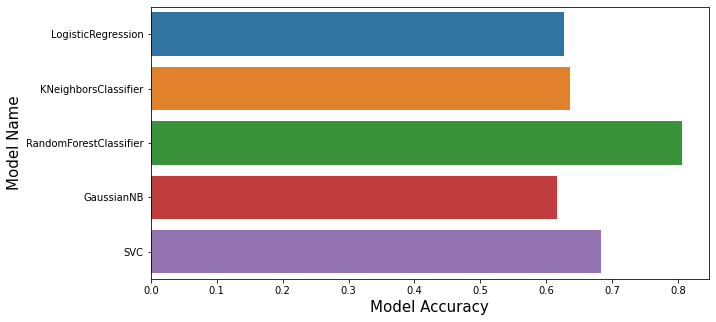

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(res['Model Accuracy'],res['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name',fontsize=15);


RandomForestClassifier have the best performance 

## Serializing the model

In [26]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pickle.dump(model, open('modelo.pickle','wb'))